# Feature Engineering. Практическая работа

Сдаётся на проверку.

## Цели практической работы

Научиться: 

*   генерировать новые признаки; 
*   нормализовать и кодировать данные с помощью lambda-функций и библиотеки scikit-learn.


## Что входит в практическую работу

1. Построить признаки из строк.
2. Преобразовать категориальные переменные.
3. Стандартизировать данные.
4. Использовать MinMaxScaler для нормализации данных.
5. Создать признаки на основе дат.
6. Сохранить датафрейм для этапа моделирования.

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, соблюдены отступы и правила расстановки пробелов.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите генерировать дополнительные признаки и завершите подготовку датасета для этапа моделирования.

## Описание датасета:
- `id`— идентификатор записи;
- `url`— URL-записи о продаже;
- `region`— регион;
- `region_url`— URL региона;
- `price`— стоимость;
- `year`— год выпуска;
- `manufacturer`— производитель;
- `model`— модель;
- `condition`— состояние;
- `cylinders`— количество цилиндров;
- `fuel`— тип топлива;
- `odometer`— количество пройденных миль;
- `title_status`— статус;
- `transmission`— коробка передач;
- `VIN`— идентификационный номер;
- `drive`— тип привода;
- `size`— размер;
- `type`— кузов;
- `paint_color`— цвет;
- `image_url`— URL изображения;
- `description`— указанное описание;
- `county`— страна;
- `state`— штат;
- `lat`— широта;
- `long`— долгота;
- `posting_date`— дата размещения объявления о продаже;
- `price_category`— категория цены.


In [3]:
# Импортируйте необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Задача 1. Построение признаков из строк

1. Загрузите датасет из `data/vehicles_dataset_upd6.csv`, выведите первые пять записей и список колонок.

In [4]:
# Ваш код здесь
df = pd.read_csv('vehicles_dataset_upd6.csv', sep = ',')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,is_jeep,is_honda,is_nissan,x0_diesel,x0_electric,x0_gas,x0_hybrid,x0_other,std_scaled_odometer,std_scaled_price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0,0,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0,0,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


In [48]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'odometer_km', 'odometer/price', 'region_new',
       'region_corrected', 'manufacturer_model', 'desc_len', 'model_in_desc',
       'price_k$', 'age_category', 'model_len', 'model_word_count', 'is_audi',
       'is_ford', 'is_chevrolet', 'is_toyota', 'is_jeep', 'is_honda',
       'is_nissan', 'x0_diesel', 'x0_electric', 'x0_gas', 'x0_hybrid',
       'x0_other', 'std_scaled_odometer', 'std_scaled_price'],
      dtype='object')

2. Выведите список значений и количество уникальных значений для модели автомобиля.

In [5]:
# Ваш код здесь
print('Значения',df.model)
print('Колл-во уникальных значений', df.model.nunique())

Значения 0          2500 crew cab big horn
1            explorer 4wd 4dr xlt
2                golf r hatchback
3                            rav4
4          1 series 128i coupe 2d
                  ...            
9614                         rav4
9615                     wrangler
9616    a3 2.0t premium plus pzev
9617                      cayenne
9618       1500 crew cab big horn
Name: model, Length: 9619, dtype: object
Колл-во уникальных значений 3341


3. Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели. С помощью lambda-функции и преобразования над строками создайте новый признак `short_model`, содержащий только первое слово из наименования модели, выведите его и количество получившихся уникальных значений.

In [6]:
# Ваш код здесь
df['short_model'] = df['model'].apply(lambda x: x.split()[0])
print('Значения', df.short_model)
print('Колличетсво', df['short_model'].nunique())

Значения 0           2500
1       explorer
2           golf
3           rav4
4              1
          ...   
9614        rav4
9615    wrangler
9616          a3
9617     cayenne
9618        1500
Name: short_model, Length: 9619, dtype: object
Колличетсво 943


### Задача 2. Преобразование категориальных переменных

1. Для категориальных переменных `short_model`, `transmission`, `region`, `manufacturer`, `state`, `title_status`, `age_category` распечатайте наименование категории и количество уникальных значений в ней.


In [7]:
# Ваш код здесь
categorial_columns = ['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']
for column in categorial_columns:
    nunique = df[column].nunique()
    print('Категория', column, 'колл-во значений', nunique)

Категория short_model колл-во значений 943
Категория transmission колл-во значений 3
Категория region колл-во значений 393
Категория manufacturer колл-во значений 40
Категория state колл-во значений 51
Категория title_status колл-во значений 6
Категория age_category колл-во значений 3


2. Создайте датафрейм `data`, содержащий только выбранные категориальные переменные.

In [8]:
# Ваш код здесь
data = df[categorial_columns]
data

,short_model,transmission,region,manufacturer,state,title_status,age_category
0,2500,other,chattanooga,ram,tn,clean,new
1,explorer,automatic,north jersey,ford,nj,clean,new
2,golf,other,reno / tahoe,volkswagen,ca,clean,new
3,rav4,automatic,fayetteville,toyota,nc,clean,average
4,1,other,knoxville,bmw,tn,clean,average
...,...,...,...,...,...,...,...
9614,rav4,automatic,chautauqua,toyota,ny,clean,old
9615,wrangler,other,binghamton,jeep,ny,clean,average
9616,a3,automatic,salem,audi,or,clean,average
9617,cayenne,automatic,madison,porsche,wi,clean,new


3. Создайте объект класса OneHotEncoder, который будет отвечать за преобразование. Уточните, что на выходе должна быть неразреженная матрица.

In [9]:
# Ваш код здесь
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

4. Идентифицируйте параметры преобразования на датафрейме с категориальными переменными.

In [10]:
# Ваш код здесь
ohe.fit(data)

OneHotEncoder(sparse=False)

5. Примените преобразование для датафрейма с категориальными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [11]:
# Ваш код здесь
ohe_data = ohe.transform(data)
ohe_data

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

6. Выведите новые наименования признаков с помощью метода `get_feature_names_out`.

In [13]:
# Ваш код здесь
ohe.get_feature_names()

array(['x0_-benz', 'x0_1', 'x0_124', ..., 'x6_average', 'x6_new',
       'x6_old'], dtype=object)

7. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [81]:
# Ваш код здесь
data[ohe.get_feature_names_out()] = ohe_data
data = pd.DataFrame(data)
data.head(5)

,short_model,transmission,region,manufacturer,state,title_status,age_category,short_model_-benz,short_model_1,short_model_124,...,state_wy,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,age_category_average,age_category_new,age_category_old
0,2500,other,chattanooga,ram,tn,clean,new,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,explorer,automatic,north jersey,ford,nj,clean,new,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,golf,other,reno / tahoe,volkswagen,ca,clean,new,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,rav4,automatic,fayetteville,toyota,nc,clean,average,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,other,knoxville,bmw,tn,clean,average,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
df = pd.concat([df, data], axis=1, join='outer')

8. Посмотрите на результат обратного преобразования получившейся матрицы в исходные признаки, используйте `inverse_transform`.

In [14]:
# Ваш код здесь
ohe.inverse_transform(ohe_data)

array([['2500', 'other', 'chattanooga', ..., 'tn', 'clean', 'new'],
       ['explorer', 'automatic', 'north jersey', ..., 'nj', 'clean',
        'new'],
       ['golf', 'other', 'reno / tahoe', ..., 'ca', 'clean', 'new'],
       ...,
       ['a3', 'automatic', 'salem', ..., 'or', 'clean', 'average'],
       ['cayenne', 'automatic', 'madison', ..., 'wi', 'clean', 'new'],
       ['1500', 'other', 'norfolk / hampton roads', ..., 'va', 'clean',
        'new']], dtype=object)

### Задача 3. Стандартизация данных

1. Создайте переменную под количественные переменные `lat`, `long`, `year`, `odometer/price`, `desc_len`, `model_in_desc`, `model_len`, `model_word_count` и создайте датафрейм `data`, содержащий только выбранные количественные переменные.


In [15]:
# Ваш код здесь
col = ['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']
data1 = df[col]
data1 = pd.DataFrame(data1)
data1.head()

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count
0,35.060000,-85.250000,2020,0.499036,4482,0,22,5
1,40.821805,-74.061962,2016,3.542852,968,0,20,4
2,33.779214,-84.411811,2017,0.394718,4286,0,16,3
3,35.715954,-78.655304,2013,8.089034,3241,0,4,1
4,35.970000,-83.940000,2012,5.515079,4851,0,22,5


2. Создайте объект `std_scaler` класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.

In [16]:
# Ваш код здесь
std_scaler = StandardScaler()
std_scaler

StandardScaler()

3. Идентифицируйте параметры преобразования на датафрейме с количественными переменными.

In [17]:
# Ваш код здесь
std_scaler.fit(data1)

StandardScaler()

4. Примените преобразование для датафрейма с количественными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [18]:
# Ваш код здесь
std_data1 = std_scaler.fit_transform(data1)
print(std_data1)
print(std_data1.shape)

[[-0.61917248  0.48424452  1.32239376 ... -0.15578836  1.16303238
   1.91066901]
 [ 0.38801429  1.11079989  0.69597272 ... -0.15578836  0.93208734
   1.23579936]
 [-0.84305905  0.531185    0.85257798 ... -0.15578836  0.47019727
   0.56092971]
 ...
 [ 1.10542805 -1.62887477 -0.08705357 ... -0.15578836  1.50944993
   1.91066901]
 [ 0.7739386   0.25195859  0.53936746 ... -0.15578836 -0.56905538
  -0.78880959]
 [-0.33773799  0.98546471  0.85257798 ... -0.15578836  1.16303238
   1.91066901]]
(9619, 8)


5. Создайте наименования новых признаков по шаблону: `lat_std` для `lat` и так далее.

In [19]:
# Ваш код здесь
col = ['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']
new_col = []
schema = "{}_std"
for cols in col:
    new_cols = schema.format(cols)
    new_col.append(new_cols)
new_col    

['lat_std',
 'long_std',
 'year_std',
 'odometer/price_std',
 'desc_len_std',
 'model_in_desc_std',
 'model_len_std',
 'model_word_count_std']

6. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [20]:
# Ваш код здесь
data1[new_col] = std_data1
data1 = pd.DataFrame(data1)
data1.head(5)

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std
0,35.060000,-85.250000,2020,0.499036,4482,0,22,5,-0.619172,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669
1,40.821805,-74.061962,2016,3.542852,968,0,20,4,0.388014,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799
2,33.779214,-84.411811,2017,0.394718,4286,0,16,3,-0.843059,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930
3,35.715954,-78.655304,2013,8.089034,3241,0,4,1,-0.504509,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810
4,35.970000,-83.940000,2012,5.515079,4851,0,22,5,-0.460101,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669


In [83]:
df = pd.concat([df, data1], axis=1, join='outer')

In [21]:
data1.columns

Index(['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc',
       'model_len', 'model_word_count', 'lat_std', 'long_std', 'year_std',
       'odometer/price_std', 'desc_len_std', 'model_in_desc_std',
       'model_len_std', 'model_word_count_std'],
      dtype='object')

### Задача 4. MinMax-нормализация данных

1. Импортируйте MinMaxScaler из `sklearn.preprocessing`.

In [22]:
# Ваш код здесь
from sklearn.preprocessing import MinMaxScaler

2. Создайте датафрейм, содержащий переменные `lat` и `long`.

In [23]:
# Ваш код здесь
coll = ['lat', 'long']
df1 = data1[coll]
df1

,lat,long
0,35.060000,-85.250000
1,40.821805,-74.061962
2,33.779214,-84.411811
3,35.715954,-78.655304
4,35.970000,-83.940000
...,...,...
9614,42.123900,-79.189500
9615,43.216990,-77.755610
9616,44.925908,-122.982753
9617,43.029559,-89.397796


3. Повторите действия пунктов 2–6 из задачи 3 для добавления в исходный датафрейм признаков `lat_mm` и `long_mm`. Выведите получившийся датафрейм.

In [24]:
# Ваш код здесь
minmax_scaler = MinMaxScaler()
minmax_scaler

MinMaxScaler()

In [25]:
minmax_scaler.fit(df1)

MinMaxScaler()

In [26]:
minmax_df1 = minmax_scaler.fit_transform(df1)
minmax_df1

array([[0.34176874, 0.28869912],
       [0.4686646 , 0.33305517],
       [0.31356118, 0.2920222 ],
       ...,
       [0.55905185, 0.13910399],
       [0.51728736, 0.27225478],
       [0.37722678, 0.32418225]])

In [27]:
coll = ['lat', 'long']
new_df1 = []
schemas = "{}_mm"
for col in coll:
    new_df = schemas.format(col)
    new_df1.append(new_df)
new_df1    

['lat_mm', 'long_mm']

In [29]:
df1[new_df1] = minmax_df1
df1.head(5)

/tmp/ipykernel_218/3201918375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[new_df1] = minmax_df1


,lat,long,lat_mm,long_mm
0,35.060000,-85.250000,0.341769,0.288699
1,40.821805,-74.061962,0.468665,0.333055
2,33.779214,-84.411811,0.313561,0.292022
3,35.715954,-78.655304,0.356215,0.314844
4,35.970000,-83.940000,0.361810,0.293893


4. Создайте переменную под географические признаки `lat`, `lat_std`, `lat_mm`, `long`, `long_std`, `long_mm` и выведите их. Посмотрите на различия в значениях для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования. 

In [30]:
# Ваш код здесь
df_geo= []
df_geo = pd.DataFrame(df_geo)
data1_geo = data1[['lat', 'long','lat_std', 'long_std']]
df1_geo = df1[['lat_mm', 'long_mm']]
df_geo = pd.concat([df_geo, data1_geo, df1_geo], axis=1)
df_geo

,lat,long,lat_std,long_std,lat_mm,long_mm
0,35.060000,-85.250000,-0.619172,0.484245,0.341769,0.288699
1,40.821805,-74.061962,0.388014,1.110800,0.468665,0.333055
2,33.779214,-84.411811,-0.843059,0.531185,0.313561,0.292022
3,35.715954,-78.655304,-0.504509,0.853562,0.356215,0.314844
4,35.970000,-83.940000,-0.460101,0.557607,0.361810,0.293893
...,...,...,...,...,...,...
9614,42.123900,-79.189500,0.615626,0.823646,0.497341,0.312727
9615,43.216990,-77.755610,0.806702,0.903947,0.521415,0.318411
9616,44.925908,-122.982753,1.105428,-1.628875,0.559052,0.139104
9617,43.029559,-89.397796,0.773939,0.251959,0.517287,0.272255


5. Выведите описательные статистики для всех географических признаков. Посмотрите на различия в статистиках для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.

In [31]:
# Ваш код здесь
std_scaler.fit(df_geo)

StandardScaler()

In [32]:
df_geo_std = std_scaler.fit_transform(df_geo)
print(std_scaler.mean_)
print(std_scaler.var_)

[ 3.86020949e+01 -9.38968752e+01  2.10525709e-16 -4.49860200e-16
  4.19778526e-01  2.54417749e-01]
[3.27263136e+01 3.18851860e+02 1.00000000e+00 1.00000000e+00
 1.58735813e-02 5.01172077e-03]


6. Выведите матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков.

Text(0.5, 0, 'lat')

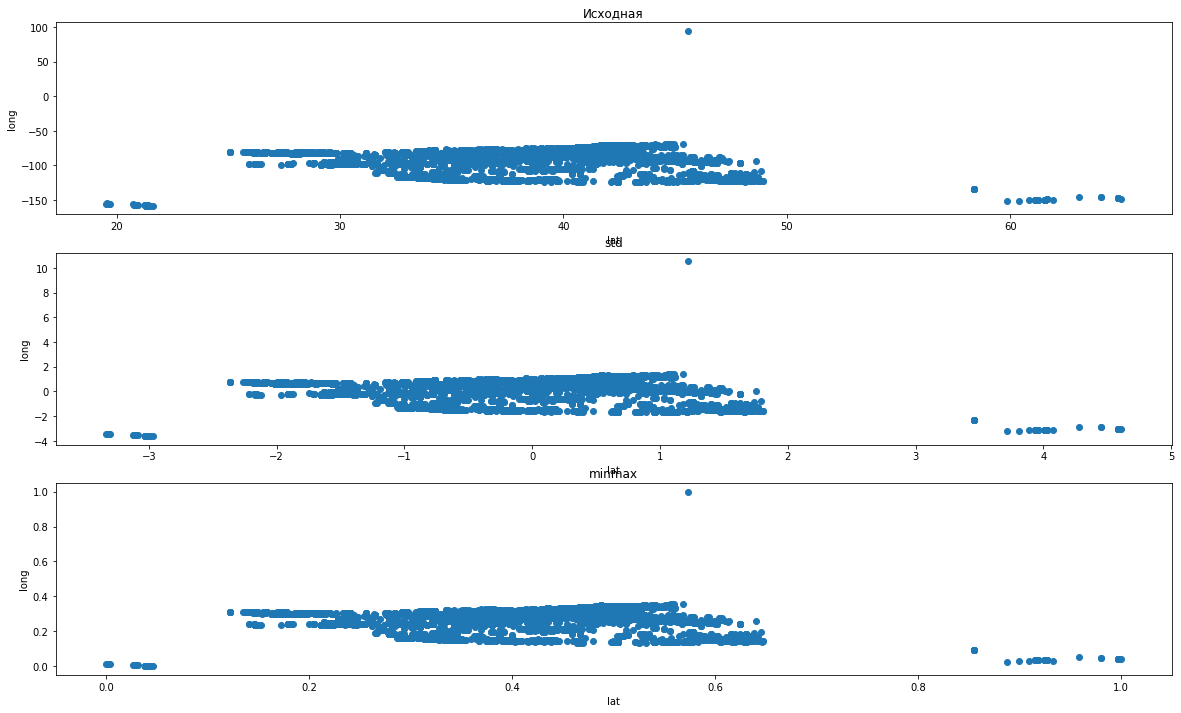

In [33]:
# Ваш код здесь
import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(20,12))
ax1.scatter(df_geo.lat,df_geo.long)
ax1.set_title('Исходная')
ax1.set_ylabel('long')
ax1.set_xlabel('lat')

ax2.scatter(df_geo.lat_std,df_geo.long_std)
ax2.set_title('std')
ax2.set_ylabel('long')
ax2.set_xlabel('lat')

ax3.scatter(df_geo.lat_mm,df_geo.long_mm)
ax3.set_title('minmax')
ax3.set_ylabel('long')
ax3.set_xlabel('lat')

### Задача 5. Признаки на основе дат

1. Выведите по отдельности колонки `posting_date` и `date`. 

In [34]:
# Ваш код здесь
print(df.posting_date)
print(df.date)

0       2021-04-17T12:30:50-0400
1       2021-05-03T15:40:21-0400
2       2021-04-28T03:52:20-0700
3       2021-04-17T10:08:57-0400
4       2021-04-08T15:10:56-0400
                  ...           
9614    2021-04-10T16:33:57-0400
9615    2021-05-03T09:36:30-0400
9616    2021-04-22T12:14:01-0700
9617    2021-04-14T09:14:42-0500
9618    2021-04-24T13:50:49-0400
Name: posting_date, Length: 9619, dtype: object
0       2021-04-17 16:30:50+00:00
1       2021-05-03 19:40:21+00:00
2       2021-04-28 10:52:20+00:00
3       2021-04-17 14:08:57+00:00
4       2021-04-08 19:10:56+00:00
                  ...            
9614    2021-04-10 20:33:57+00:00
9615    2021-05-03 13:36:30+00:00
9616    2021-04-22 19:14:01+00:00
9617    2021-04-14 14:14:42+00:00
9618    2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: object


2. Ранее преобразованная колонка `date` после сохранения в файл и загрузки из него содержит данные в строковом формате, поэтому измените её тип c помощью `pd.to_datetime`.

In [35]:
# Ваш код здесь
df['date'] = pd.to_datetime(df['date'])

3. Несколькими способами извлеките номер месяца продажи автомобиля.

3.1. Из переменной `posting_date` с помощью lambda-функции и операций над строками.

In [36]:
# Ваш код здесь
month1 = df['posting_date'].apply(lambda x: x.split('-')[1])
month1

0       04
1       05
2       04
3       04
4       04
        ..
9614    04
9615    05
9616    04
9617    04
9618    04
Name: posting_date, Length: 9619, dtype: object

3.2. Из переменной `date` с помощью lambda-функции и метода `month`.

In [37]:
# Ваш код здесь
month = df.date.apply(lambda x: x.month)
month

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

3.3. Из переменной `date` с помощью `dt` и метода `month`.

In [38]:
# Ваш код здесь
df.date.dt.month

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

4. Создайте любым из способов (3.2 или 3.3) признак `month`, обозначающий номер месяца размещения объявления о продаже автомобиля, и распечатайте его.

In [78]:
# Ваш код здесь
month = df['date'].apply(lambda x: x.month)
month

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

5. Создайте признак `dayofweek`, обозначающий день недели размещения объявления о продаже автомобиля, и распечатайте его.

In [41]:
# Ваш код здесь
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek = df['date'].apply(lambda x: days[x.weekday()])
dayofweek

0        Saturday
1          Monday
2       Wednesday
3        Saturday
4        Thursday
          ...    
9614     Saturday
9615       Monday
9616     Thursday
9617    Wednesday
9618     Saturday
Name: date, Length: 9619, dtype: object

6. Создайте признак `diff_years`, обозначающий количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля, и распечатайте его. Дополнительные корректировки не применяйте.

In [72]:
# Ваш код здесь
df.year = pd.to_datetime(df['year'], format='%Y',utc=True)
diff_years = (df['date'] - df['year']).dt.days // 365
diff_years = diff_years.array.reshape(-1,1)
diff_years = pd.DataFrame(diff_years)
diff_years.columns = ['diff_years']
diff_years

,diff_years
0,1
1,5
2,4
3,8
4,9
...,...
9614,19
9615,13
9616,10
9617,6


7. Примените стандартизацию к новым признаками и сохраните результат в новые признаки вида `month_std`.

In [71]:
# Ваш код здесь
std_scaler = StandardScaler()
std_scaler
std_scaler.fit(diff_years)
diff_years_std = std_scaler.fit_transform(diff_years)
diff_years_std = pd.DataFrame(diff_years_std)
diff_years_std.columns = ['diff_years_std']
diff_years_std

,diff_years_std
0,-1.322394
1,-0.695973
2,-0.852578
3,-0.226157
4,-0.069552
...,...
9614,1.496501
9615,0.556869
9616,0.087054
9617,-0.539367


In [84]:
df = pd.concat([df, diff_years_std], axis=1, join='outer')

In [73]:
dayofweeks = df['date'].apply(lambda x: x.weekday())
dayofweeks = dayofweeks.array.reshape(-1,1)
dayofweeks = pd.DataFrame(dayofweeks)
std_scaler = StandardScaler()
std_scaler.fit(dayofweeks)
dayofweek_std = std_scaler.fit_transform(dayofweeks)
dayofweek_std = pd.DataFrame(dayofweek_std)
dayofweek_std.columns = ['dayofweek_std']
dayofweek_std

,dayofweek_std
0,1.120284
1,-1.374972
2,-0.376870
3,1.120284
4,0.122182
...,...
9614,1.120284
9615,-1.374972
9616,0.122182
9617,-0.376870


In [85]:
df = pd.concat([df, dayofweek_std], axis=1, join='outer')

In [79]:
month = month.array.reshape(-1,1)
std_scaler = StandardScaler()
std_scaler
std_scaler.fit(month)
month_std = std_scaler.fit_transform(month)
month_std = pd.DataFrame(month_std)
month_std.columns = ['month_std']
month_std

,month_std
0,-0.615846
1,1.623784
2,-0.615846
3,-0.615846
4,-0.615846
...,...
9614,-0.615846
9615,1.623784
9616,-0.615846
9617,-0.615846


In [86]:
df = pd.concat([df, month_std], axis=1, join='outer')

### Задача 6. Сохранение датафрейма для этапа моделирования

1. Удалите колонки, которые были исходными для формирования признаков, а также новые признаки, которые были добавлены с целью обучения.  Сохраните новый датафрейм в переменную `df_prepared`.

In [90]:
# Допишите код

columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'odometer_km', 'odometer/price', 'region_new', 'region_corrected', 'manufacturer_model',
                    'desc_len', 'model_in_desc', 'price_k$', 'age_category', 'model_len', 'model_word_count',
                    'short_model', 'lat_mm', 'long_mm', 'date', 'std_scaled_price',
                    'month', 'dayofweek', 'diff_years',
                    'odometer/price_std']

for col in columns_for_drop:
    if col in df.columns:
        df.drop(columns=col)
    else:
        print('Колонка', col, 'не найдена')


Колонка lat_mm не найдена
Колонка long_mm не найдена
Колонка month не найдена
Колонка dayofweek не найдена
Колонка diff_years не найдена


2. Распечатайте оставшийся список колонок и размерность финального датафрейма.

In [93]:
# Ваш код здесь
print(df.columns)
print(df.size)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer',
       ...
       'long_std', 'year_std', 'odometer/price_std', 'desc_len_std',
       'model_in_desc_std', 'model_len_std', 'model_word_count_std',
       'diff_years_std', 'dayofweek_std', 'month_std'],
      dtype='object', length=1511)
14534309


3. Запишите преобразованный датафрейм в файл `data/vehicles_dataset_prepared.csv`, индекс не сохраняйте.

In [94]:
# Ваш код здесь
df.to_csv('vehicles_dataset_prepared.csv', index=False)

## Описание преобразованного датасета:
- `id`— идентификатор записи;
- `is_manufacturer_name`— признак производителя автомобиля;

- `region_*`— регион;
- `x0_*`— тип топлива;
- `manufacturer_*`— производитель;
- `short_model_*`— сокращённая модель автомобиля;
- `title_status_*`— статус;
- `transmission_*`— коробка передач;
- `state_*`— штат;
- `age_category_*`— возрастная категория автомобиля;

- `std_scaled_odometer`— количество пройденных миль (после стандартизации);
- `year_std`— год выпуска (после стандартизации);
- `lat_std`— широта (после стандартизации);
- `long_std`— долгота (после стандартизации);
- `odometer/price_std`— отношение стоимости к пробегу автомобиля (после стандартизации);
- `desc_len_std`— количество символов в тексте объявления о продаже (после стандартизации);
- `model_in_desc_std`— количество наименований модели автомобиля в тексте объявления о продаже (после стандартизации);
- `model_len_std`— длина наименования автомобиля (после стандартизации);
- `model_word_count_std`— количество слов в наименовании автомобиля (после стандартизации);
- `month_std`— номер месяца размещения объявления о продаже автомобиля (после стандартизации);
- `dayofweek_std`— день недели размещения объявления о продаже автомобиля (после стандартизации);
- `diff_years_std`— количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля (после стандартизации);

- `price`— стоимость;
- `price_category`– категория цены.